<a href="https://colab.research.google.com/github/roop01/python-visualization/blob/main/01_seaborn_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statistical Plots Using Seaborn**

Seaborn is a Python library built on top of Matplotlib that offers a more high-level interface for creating statistical visualizations. Compared to Matplotlib, Seaborn provides more specialized tools for exploring relationships between multiple variables, such as joint plots and pair plots. Additionally, Seaborn includes many pre-built plot styles and color palettes that make it easy to create beautiful, publication-quality graphics with minimal customization.

Following chart shows the Different types of statistical plots used for data analysis.

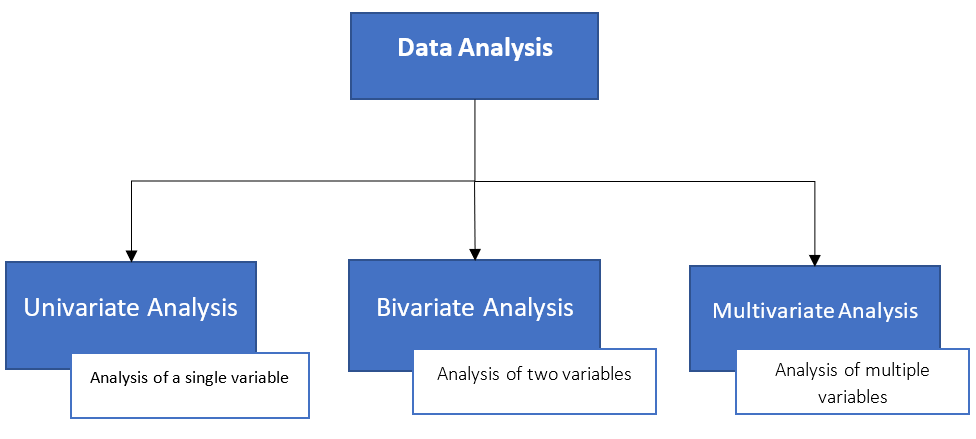

**Univariate Analysis:** Helps to It is the analysis of a single variable, that helps to understand the distribution of the data. Seaborn provides several functions for univariate analysis, including:

* Histograms: To visualize the distribution of a single variable.
* Density plots: To estimate the probability density function of a continuous variable.
* Box plots: To summarize the distribution of a variable using its quartiles and outliers.
* Violin plots: To combine the information from the box plot and density plot for a variable.

**Bivariate Analysis:** Used to understand the relationship between the two variables. Seaborn provides several functions for bivariate analysis, including:

* Scatter plots: To visualize the relationship between two continuous variables.
* Joint plots: To visualize the relationship between two continuous variables using a scatter plot and their distributions using histograms or density plots.

**Multivariate Analysis:** It is used to understand the relationships between multiple variables. Seaborn provides several functions for multivariate analysis, including:

* Pair plots: To visualize the pairwise relationship between multiple variables.
* Heat maps: To visualize the correlation matrix between multiple variables.

Let's consider a use case and explore the above discussed statistical plots using Seaborn.

When working with real-world datasets, it's often important to visualize the data to identify outliers, observe data distributions, and understand the statistical relationships between variables. Seaborn is a library that provides various graphs and plots that are useful for this type of analysis. One such dataset that can be analyzed using Seaborn is the Pima Indians Diabetes dataset.


The **Pima Indians Diabetes** dataset contains medical information for Pima Indians, a Native American tribe in Arizona, USA. The dataset was collected by the US National Institute of Diabetes and Digestive and Kidney Diseases.

The dataset contains information for 768 individuals, including 268 who have been diagnosed with diabetes and 500 who have not. The dataset has eight input variables and one binary output variable:

1. pregnancies: the number of times the person has been pregnant

2. glucose: the person's blood glucose level

3. blood_pressure: the person's blood pressure (mm Hg)

4. skin_thickness: the person's skin fold thickness (mm)

5. insulin: the person's insulin level (mu U/ml)

6. bmi: the person's body mass index (weight in kg/(height in m)^2)

7. diabetes_pedigree_function: a function that estimates the likelihood of diabetes based on family history

8. age: the person's age (years)

9. diabetes: 1 if the person has been diagnosed with diabetes, and 0 otherwise.

Now, let’s understand how we can perform visualizations on this dataset.

In [ ]:
#Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# load the dataset
diabetes = pd.read_csv('/content/sample_data/diabetes.csv')
diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Univariate Analysis**

 Let us perform univariate analysis through histogram, density plot, box plot, and violin plots.

**1. Histogram**

Visualize the distribution of Body Mass Index (BMI) among people in the Pima Indian community.

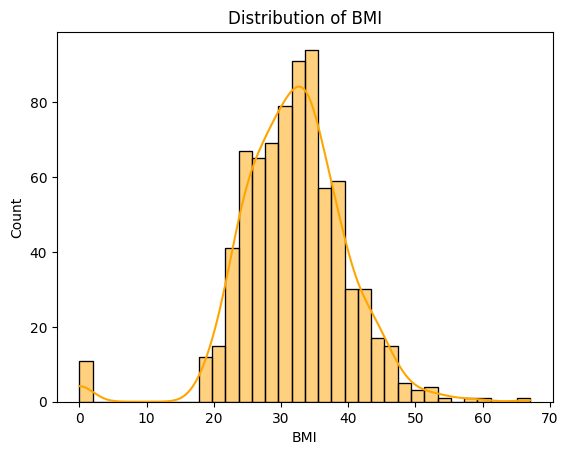

In [ ]:
#sns.histplot(diabetes['BMI'], kde=False)
sns.histplot(diabetes['BMI'], kde=True, color='orange')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()


**Analysis:**

It can be observed that the BMI attribute follows approximately normal distribution with some outliers.


**2. Density Plot**

Estimate the probability density function of blood pressure among people in the Pima Indian community with diabetes.

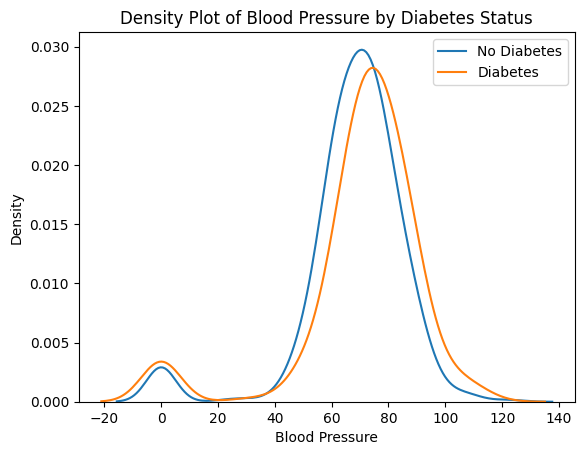

In [ ]:
# Create density plot
sns.kdeplot(diabetes[diabetes['Outcome']==0]['BloodPressure'], label='No Diabetes')
#Uncomment the above line for comparing diabetes and no-diabetes
sns.kdeplot(diabetes[diabetes['Outcome']==1]['BloodPressure'], label='Diabetes')
plt.title('Density Plot of Blood Pressure by Diabetes Status')
plt.xlabel('Blood Pressure')
plt.ylabel('Density')
plt.legend()
plt.show()


**Analysis:**

* The plot allows us to visualize the distribution of Blood Pressure among people with diabetes and estimate the likelihood of certain Blood Pressure values occurring.

* It can be observed that the highest density of Blood Pressure values is around 70-80, and the distribution appears to be somewhat Normal.

* This information could be useful in understanding the potential risk factors associated with diabetes and hypertension and informing clinical decision-making.

**Gestational diabetes mellitus (GDM)**

Let’s plot density plot for age among people in the Pima Indian community with and without a history of gestational diabetes to analyze whether there is any significance difference in distribution of age.

In [ ]:
gestational_diabetes = diabetes.loc[diabetes['Age'] > 30]


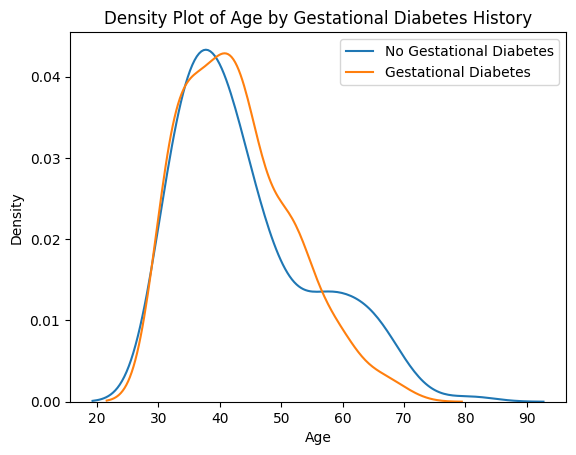

In [ ]:
# Create density plot
sns.kdeplot(gestational_diabetes[gestational_diabetes['Outcome']==0]['Age'], label='No Gestational Diabetes')
sns.kdeplot(gestational_diabetes[gestational_diabetes['Outcome']==1]['Age'], label='Gestational Diabetes')
plt.title('Density Plot of Age by Gestational Diabetes History')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


**Analysis:**

* The density plot shows the probability density function of age for each group, with a clear separation between the two distributions.

* The plot suggests that people with a history of gestational diabetes are more likely to be in their mid-30s to mid-40s, while those without a history of gestational diabetes are more likely to be in their 20s to early 30s.

**3.Box plot**

Assume that it’s required to compare the distribution of glucose levels among people with diabetes and without diabetes in the Pima Indian community.  In this case we can use a Box Plot to perform the visualization.


To begin with let us plot a box plot illustrating distribution of glucose for people with diabetes (i.e., with Outcome=1).

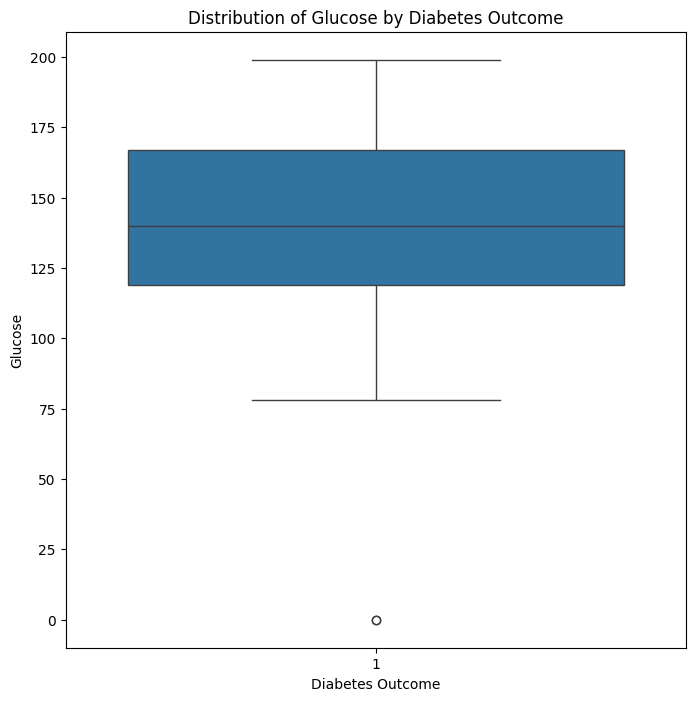

In [ ]:
# Create box plot for - Distribution of Glucose by Diabetes Outcome- with diabetes
diabetes_1 = diabetes.loc[diabetes['Outcome']==1] # filter only diabetes cases
fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_1)
plt.title('Distribution of Glucose by Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Glucose')
plt.show()


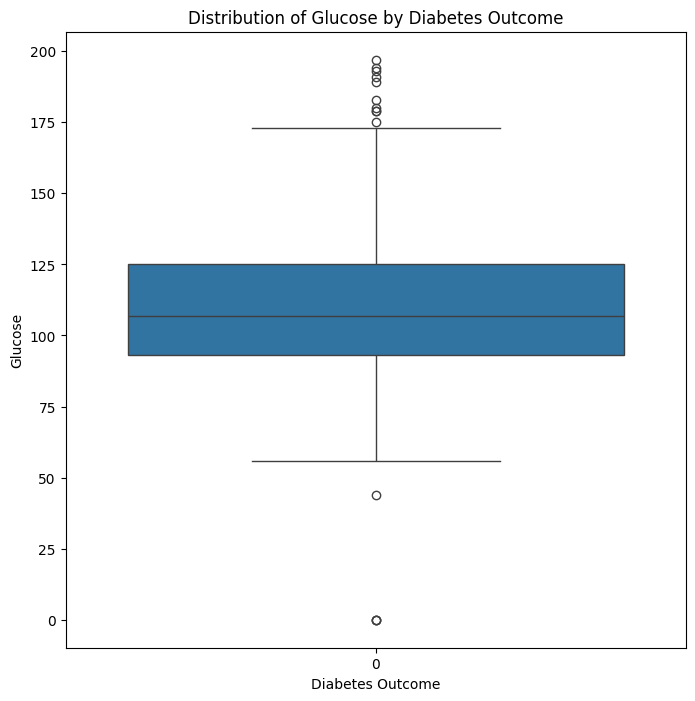

In [ ]:
# create box plot for - Distribution of Glucose by Diabetes Outcome - without diabetes (i.e., with Outcome=0)
diabetes_2 = diabetes.loc[diabetes['Outcome']==0] # filter only non-diabetes cases
fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_2)
plt.title('Distribution of Glucose by Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Glucose')
plt.show()


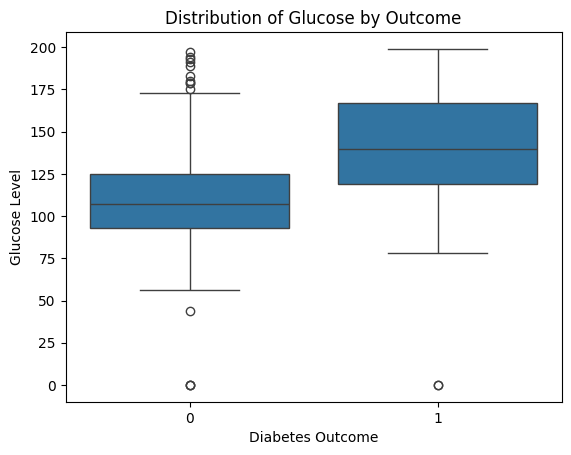

In [ ]:
# Let's compare the distribution of glucose by diabetes outcome
sns.boxplot(x='Outcome', y='Glucose', data=diabetes)
plt.title('Distribution of Glucose by Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Glucose Level')
plt.show()


**Analysis:**

* The box plot shows the median glucose, the IQR, and outliers for each group.
From this plot, we can see that the glucose levels for people with diabetes is much higher than for those without diabetes.
* Also, the median glucose level for people without diabetes is around 100 and median glucose level for people without diabetes is around 150.

# **Violin plot**

A violin plot is a type of data visualization that combines a box plot with a kernel density plot. It displays the distribution of data and provides insights into its shape, symmetry, and outliers.

Combine the information from the box plot and density plot for age among people in the Pima Indian community with and without a history of gestational diabetes to investigate potential long-term health consequences and potential risk factors for future pregnancies.

First, we will plot a violin plot for people with diabetes.

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
2              8      183             64              0        0  23.3   
4              0      137             40             35      168  43.1   
6              3       78             50             32       88  31.0   
8              2      197             70             45      543  30.5   
..           ...      ...            ...            ...      ...   ...   
755            1      128             88             39      110  36.5   
757            0      123             72              0        0  36.3   
759            6      190             92              0        0  35.5   
761            9      170             74             31        0  44.0   
766            1      126             60              0        0  30.1   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
2                  

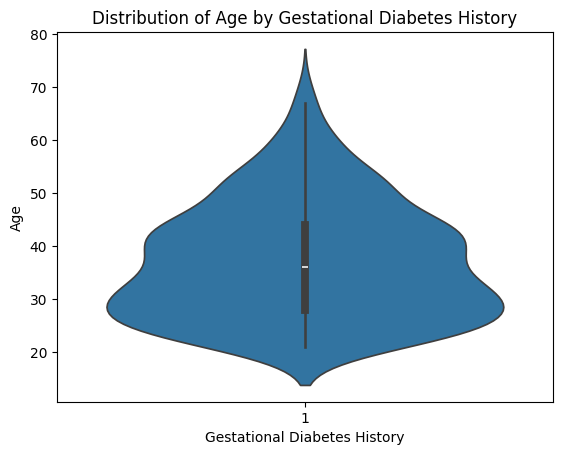

In [ ]:
# Create violin plot
gestational_diabetes = diabetes.loc[diabetes['Age'] > 30]
gestational_diabetes=diabetes.loc[diabetes['Outcome'] ==1]
print(gestational_diabetes)
sns.violinplot(x='Outcome', y='Age', data=gestational_diabetes)
plt.title('Distribution of Age by Gestational Diabetes History')
plt.xlabel('Gestational Diabetes History')
plt.ylabel('Age')
plt.show()


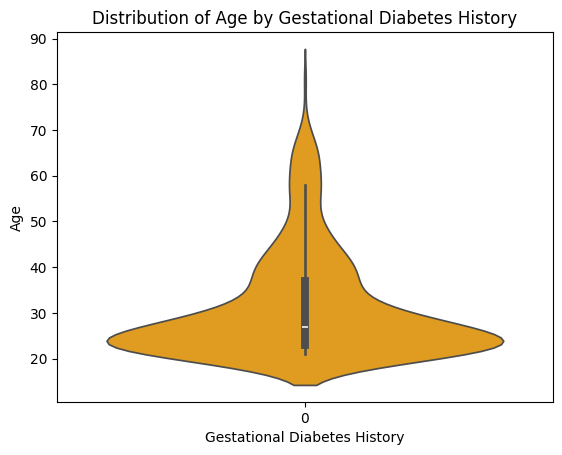

In [ ]:
# plot a violin plot for people without diabetes now.
gestational_diabetes = diabetes.loc[diabetes['Age'] > 30]
gestational_diabetes=diabetes.loc[diabetes['Outcome'] ==0]
#print(gestational_diabetes)
sns.violinplot(x='Outcome', y='Age', data=gestational_diabetes, color='Orange')
plt.title('Distribution of Age by Gestational Diabetes History')
plt.xlabel('Gestational Diabetes History')
plt.ylabel('Age')
plt.show()


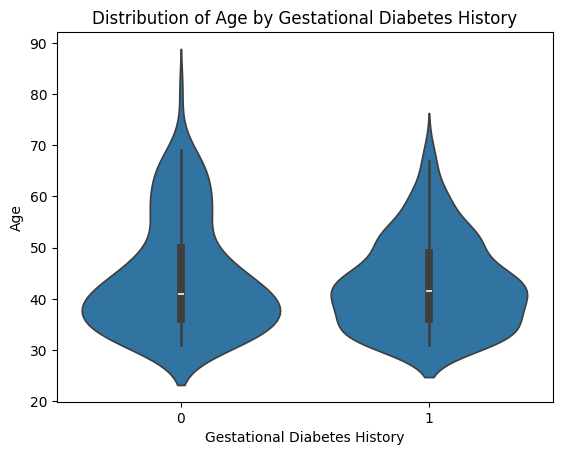

In [ ]:
# Create violin plot
gestational_diabetes = diabetes.loc[diabetes['Age'] > 30]
#print(gestational_diabetes)
sns.violinplot(x='Outcome', y='Age', data=gestational_diabetes)
plt.title('Distribution of Age by Gestational Diabetes History')
plt.xlabel('Gestational Diabetes History')
plt.ylabel('Age')
plt.show()


**Analysis:**

* The violin plot shows the same information as the box plot, but also includes the shape of the distribution.

* We can see that the distribution of ages for people with gestational diabetes is slightly wider and flatter, indicating a larger variance in ages.

* It can be concluded that the age may be a potential risk factor for gestational diabetes in the Pima Indian community.

**2. Bivariate Analysis**

This is an analysis of two variables, where you want to understand the relationship between the two variables. Seaborn provides several functions for bivariate analysis, including:

1. Scatter plot: To visualize the relationship between two continuous variables.

2. Joint plot:To visualize the relationship between two continuous variables using a scatter plot and their distributions using histograms or density plots.

**1. Scatter plot**

Create a scatter plot of Age and Blood Pressure for people with diabetes to analyze impact of age on blood pressure.

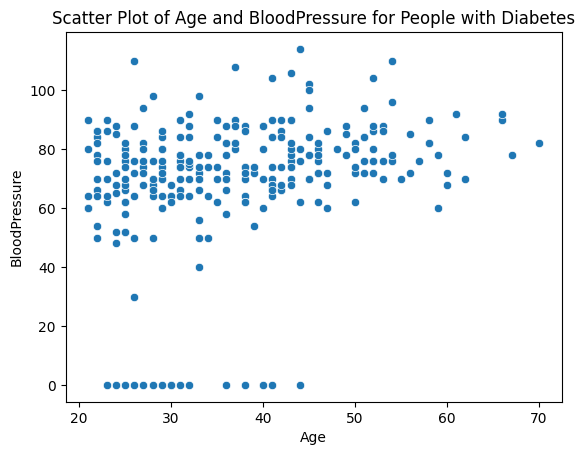

In [ ]:
# Create a scatter plot of Age and BloodPressure for people with diabetes
sns.scatterplot(x='Age', y='BloodPressure', data=diabetes[diabetes['Outcome']==1])
plt.title('Scatter Plot of Age and BloodPressure for People with Diabetes')
plt.xlabel('Age')
plt.ylabel('BloodPressure')
plt.show()


**Analysis:**

* The scatter plot shows a weak positive correlation between age and blood pressure. As age increases, there is a slight increase in blood pressure.
* This is expected, as blood pressure tends to increase with age. The scatter plot also shows a few outliers, which are data points that fall far from the main cluster of points (Ex: Blood Pressure value=0).
* These outliers may represent individuals with unusual age and blood pressure values or may be due to measurement errors or other factors.

**2. Joint Plot**

Explore the relationship between age and BMI among people in the Pima Indian community and also, plot the individual distribution.

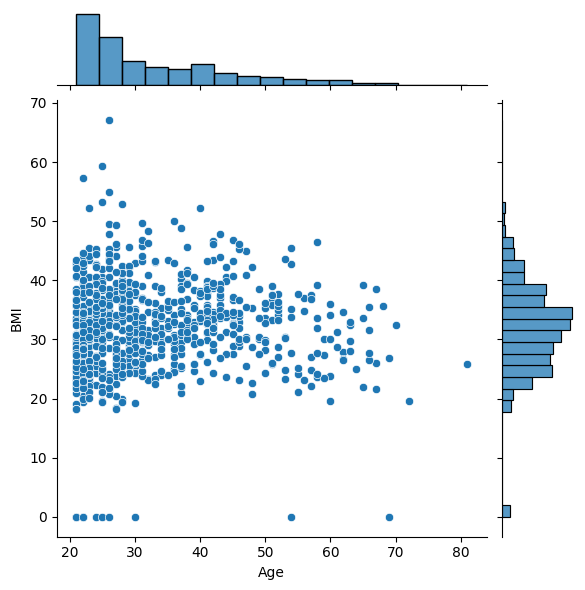

In [ ]:
# Create a joint plot of Age and BMI
sns.jointplot(x='Age', y='BMI', data=diabetes)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()


**Analysis:**

* The joint plot shows a weak positive correlation between age and BMI. As age increases, there is a slight increase in BMI. This is expected, as BMI tends to increase with age.
* The scatter plot also shows a few outliers, which are data points that fall far from the main cluster of points (Ex: BMI value =0- are outliers).
* The distribution of BMI appears to be roughly normal, with the majority of individuals falling between the BMI of 20 and 50. There are a few individuals with a BMI above 50, which represent the outliers on the scatter plot.
* The distribution of Age in the joint plot is skewed right, with most individuals having a Age between 20 and 40 years. There are relatively fewer individuals in the dataset who are over the age of 60.

**3. Multivariate Analysis**

This is an analysis of multiple variables, where you want to understand the relationships between multiple variables. Seaborn provides several functions for multivariate analysis, including:

Pair plots: To visualize the pairwise relationship between multiple variables.

Heat maps: To visualize the correlation matrix between multiple variables.

**1. Pair plot**

We can explore how "Insulin", "SkinThickness", "Age", and "BMI" relate to each other in the pima Indians diabetes dataset using pair plot and analyze how these relationships differ between individuals with and without diabetes.

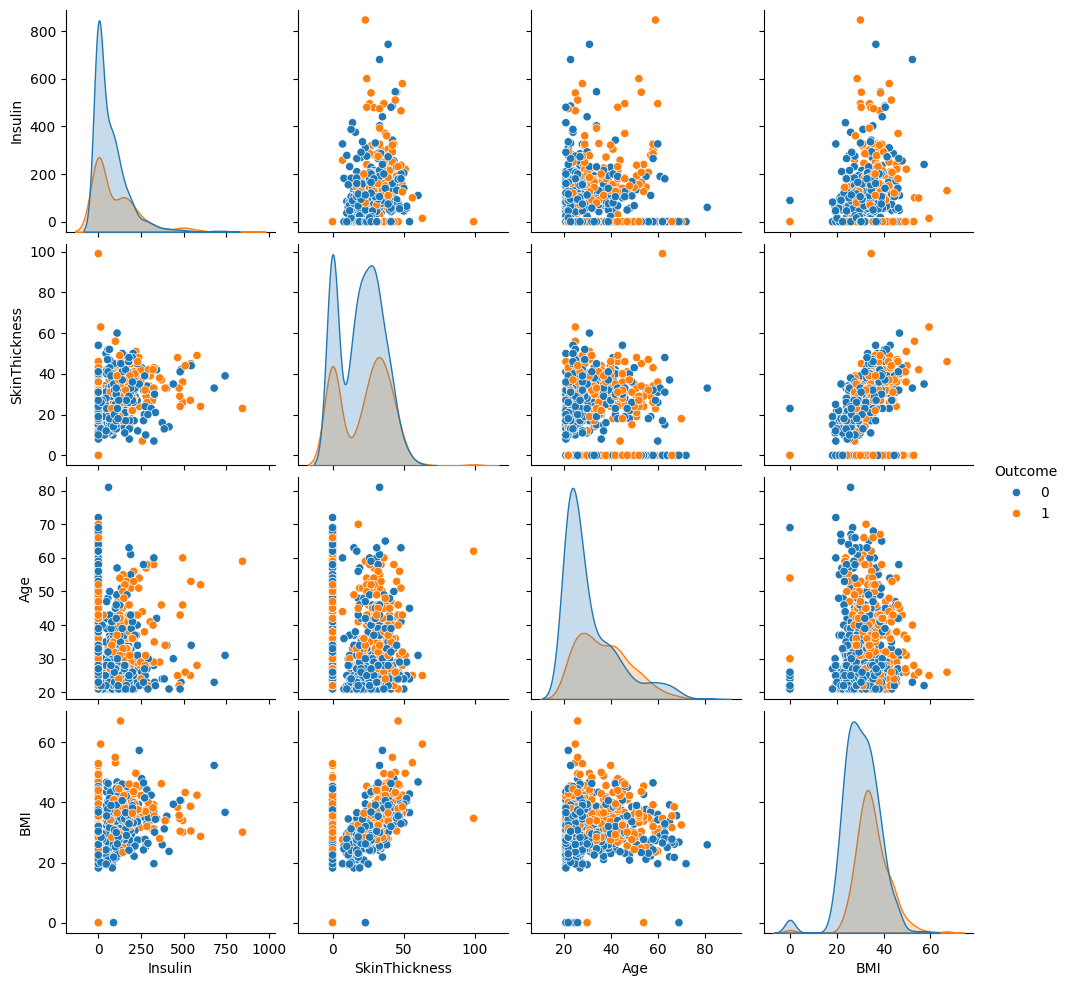

In [ ]:
sns.pairplot(diabetes, vars=['Insulin', 'SkinThickness', 'Age', 'BMI'], hue='Outcome')
# display the plot
plt.show()


**Analysis:**

* Based on the scatter plots, we can see that there is a positive correlation between "Insulin" and "BMI" for individuals with and without diabetes.

* Additionally, there is a positive correlation between "SkinThickness" and "BMI" for individuals without diabetes, but this correlation is weaker for individuals with diabetes.

* We can see that the distribution of "Insulin" is higher for individuals with diabetes compared to those without diabetes.

* The distribution of "SkinThickness" is also higher for individuals with diabetes, although there is some overlap with the distribution for individuals without diabetes.

* The distributions of "Age" and "BMI" are fairly similar between individuals with and without diabetes.

**2. Heat Map**

Explore the correlation between variables in the Pima Indians Diabetes Dataset using a heat map.

<Axes: >

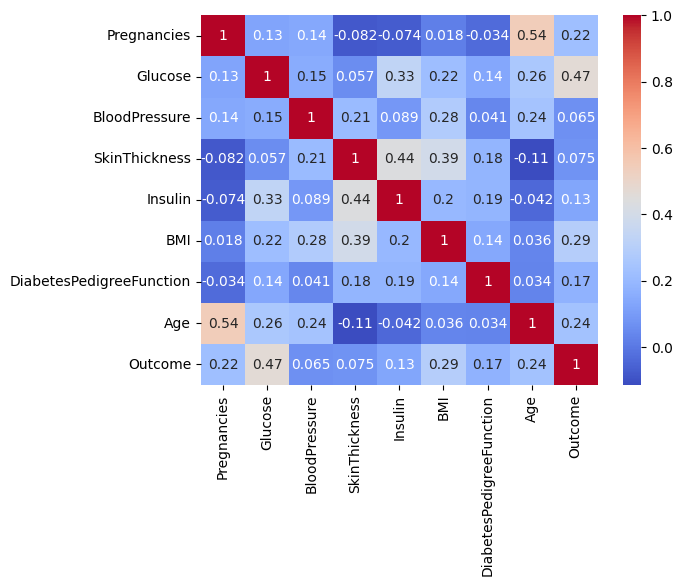

In [ ]:
# Create a correlation matrix
corr = diabetes.corr()
# Create a heat map to visualize the correlation matrix
sns.heatmap(corr, cmap='coolwarm', annot=True)


**Analysis:**

* It can be observed that there are some variables that are strongly correlated with each other. For example, "Pregnancies" is positively correlated with "Age" and "BMI", while "Glucose" is positively correlated with "Insulin".

* Also, there are some variables that have a weak or no correlation with other variables. For example, "DiabetesPedigreeFunction" has a weak correlation with most of the other variables in the dataset.

# **Excercise**

Download the **HumanResource** dataset. Using seaborn, create the following visualizations and draw insights from the data:

1. Create a scatter plot for the relationship between the salary and engagement survey score
2. Create a histogram for the distribution of salaries for all employees in the dataset.
3. Create a density plot for the distribution of engagement survey scores for all employees in the dataset.
4. Create a box plot to show the distribution of salary based on employee gender.
5. Create a violin plot to compare the distribution of engagement survey scores between male and female employees.
6. Create a Joint plot to analyze the distribution of engagement survey score and salary among the employees.
7. Create a pair plot to visualize how numerical variables in the data set relate to each other.
8. Visualize and analyze the correlation between the numerical variables in the data set using a Heat map.